# Customer Chrun Prediction-EDA

In [15]:
# STEP 0: Setup & Configuration
# =========================
# Bank Customer Churn EDA
# =========================

import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_theme(style="whitegrid")

# Create visuals directory
os.makedirs("../visuals", exist_ok=True)

In [16]:
# STEP 1: Load & Inspect Data
# Load dataset
data_path = "../data/raw/Churn_Modelling.csv"
df = pd.read_csv(data_path) 

In [17]:
# Quick inspection
df.head()
df.shape
df.info()
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [18]:
# STEP 2: Schema Validation & Business Hygiene
# Column names
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
# Target distribution
churn_rate = df["Exited"].value_counts(normalize=True)
churn_rate

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

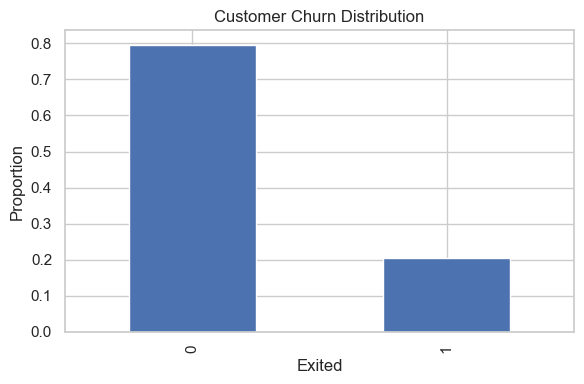

In [20]:
# Create subfolder correctly
os.makedirs("../visuals/eda", exist_ok=True)

# Plot churn rate
plt.figure(figsize=(6, 4))
churn_rate.plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.ylabel("Proportion")
plt.xlabel("Exited")
plt.tight_layout()

# Save into visuals/eda subfolder
plt.savefig("../visuals/eda/churn_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [21]:
# STEP 3: Data Quality Checks (Business-Critical)
# Missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [22]:
# Duplicate customers (NOT full rows)
df["CustomerId"].duplicated().sum()

0

In [23]:
# Drop non-informative identifiers after seeing the data 
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

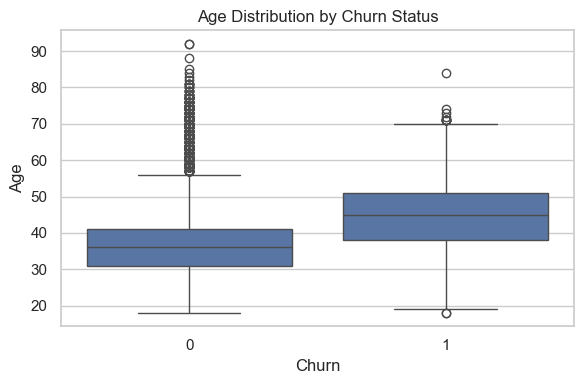

In [26]:
# STEP 4: Business-Driven EDA (Core Insights)
# 4.1 Age vs Churn
plt.figure(figsize=(6, 4)) 
sns.boxplot(x="Exited", y="Age", data=df) 
plt.title("Age Distribution by Churn Status") 
plt.xlabel("Churn") # Explicitly label x-axis 
plt.ylabel("Age") # Explicitly label y-axis 
plt.tight_layout() 

# # Save into visuals/eda subfolder 
plt.savefig("../visuals/eda/age_vs_churn.png", dpi=300, bbox_inches="tight") 
plt.show()

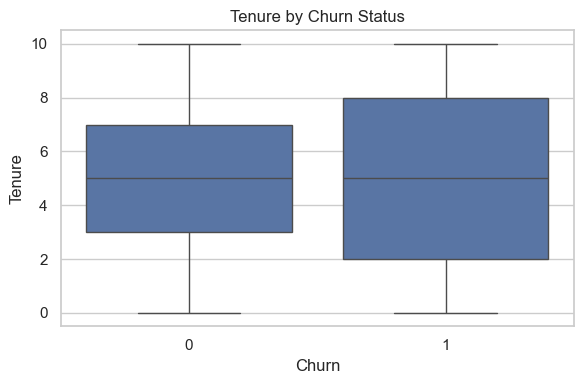

In [27]:
# 4.2 Tenure vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x="Exited", y="Tenure", data=df)
plt.title("Tenure by Churn Status")
plt.xlabel("Churn")   # Explicitly label x-axis
plt.ylabel("Tenure")   # Explicitly label y-axis
plt.tight_layout()

# Save into visuals/eda subfolder
plt.savefig("../visuals/eda/tenure_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()


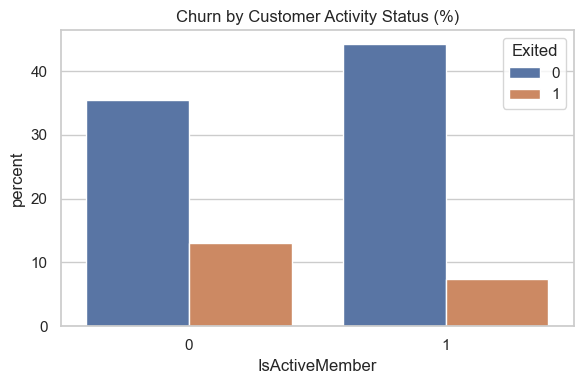

In [28]:
# 4.3 Activity Status vs Churn (Proportions)
plt.figure(figsize=(6, 4))
sns.countplot(
    x="IsActiveMember",
    hue="Exited",
    data=df,
    stat="percent"
)
plt.title("Churn by Customer Activity Status (%)")
plt.tight_layout()
plt.savefig("../visuals/eda/activity_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

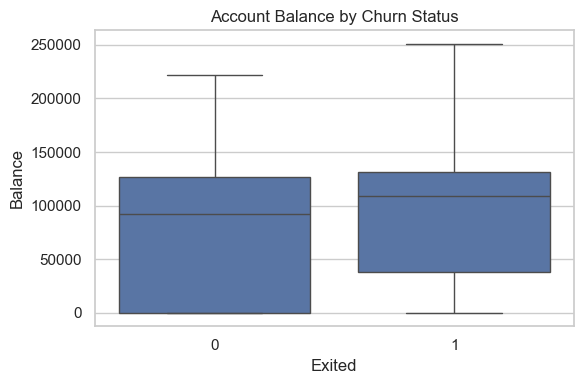

In [29]:
# 4.4 Balance vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Account Balance by Churn Status")
plt.tight_layout()
plt.savefig("../visuals/eda/balance_vs_churn.png", dpi=300, bbox_inches="tight")
plt.show()

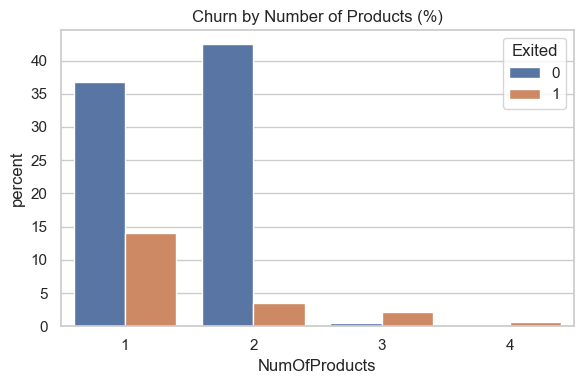

In [30]:
# 4.5 Number of Products vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(
    x="NumOfProducts",
    hue="Exited",
    data=df,
    stat="percent"
)
plt.title("Churn by Number of Products (%)")
plt.tight_layout()
plt.savefig("../visuals/eda/products_vs_churn.png", dpi=300, bbox_inches="tight") 
plt.show()

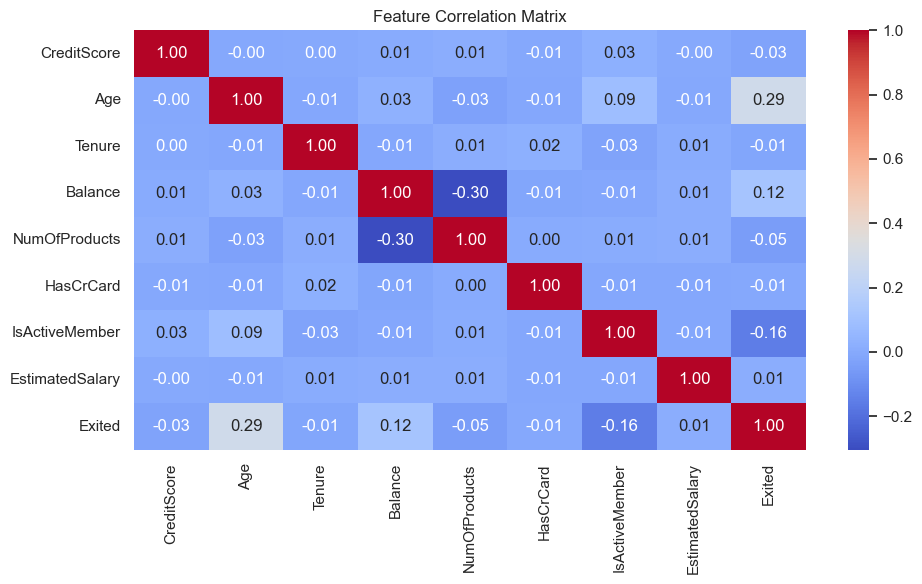

In [31]:
# STEP 5: Correlation Analysis (Feature Justification)
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig("../visuals/eda/correlation_matrix.png", dpi=300, bbox_inches="tight") 
plt.show()

In [33]:
# STEP 6: Save Cleaned EDA Data
df.to_csv("../data/processed/churn_eda_clean.csv", index=False)